In [2]:
# Load all necessary libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

In [3]:
# Read in the deathrate 
deathrate = pd.read_csv("deathrate.csv")
print(deathrate.dtypes)
deathrate

Unnamed: 0      int64
Year            int64
County         object
FIPS            int64
Deathrate       int64
Population      int64
Poverty       float64
dtype: object


,Unnamed: 0,Year,County,FIPS,Deathrate,Population,Poverty
0,1,1999,"Abbeville County, SC",45001,1,25921,3257.0
1,2,1999,"Acadia Parish, LA",22001,7,58762,12461.0
2,3,1999,"Accomack County, VA",51001,5,37614,6107.0
3,4,1999,"Ada County, ID",16001,7,294292,24964.0
4,5,1999,"Adair County, IA",19001,1,8298,697.0
...,...,...,...,...,...,...,...
50159,50160,2014,"Yuma County, AZ",4027,15,203247,44112.0
50160,50161,2014,"Yuma County, CO",8125,9,10202,1394.0
50161,50162,2014,"Zapata County, TX",48505,13,14319,4654.0
50162,50163,2014,"Zavala County, TX",48507,15,12267,3672.0


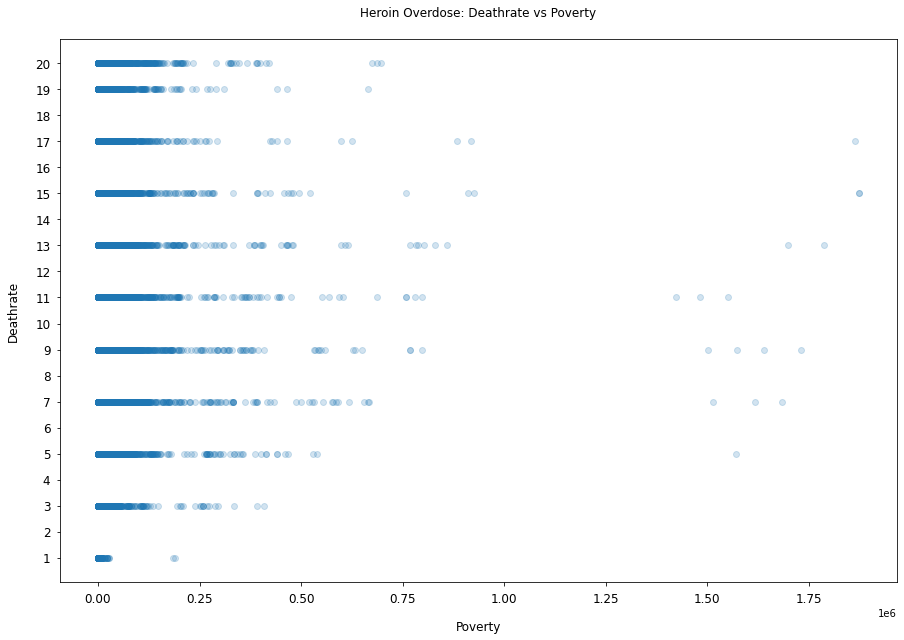

In [5]:
yint = range(min(deathrate['Deathrate']), max(deathrate['Deathrate'])+1)

fig, ax = plt.subplots(figsize=(15,10)) 
plt.scatter(deathrate['Poverty'], deathrate['Deathrate'], alpha=0.2)
plt.title("Heroin Overdose: Deathrate vs Poverty", y=1.03)
plt.xlabel("Poverty", fontsize=12, labelpad=15)
plt.ylabel("Deathrate", fontsize=12, labelpad=15)
plt.yticks(yint) # Clearly label the y axis 
plt.tick_params(labelsize=12, pad=6);

there is a lot of ODs in poorer counties and it decreases as you go up in socioeconomic status 
in the middle class, there is no deaths ih the middle (class?) 
some in the upper ranges 
also no even number deaths except for 20 for some reason? 
(no zeros included in the data set) 

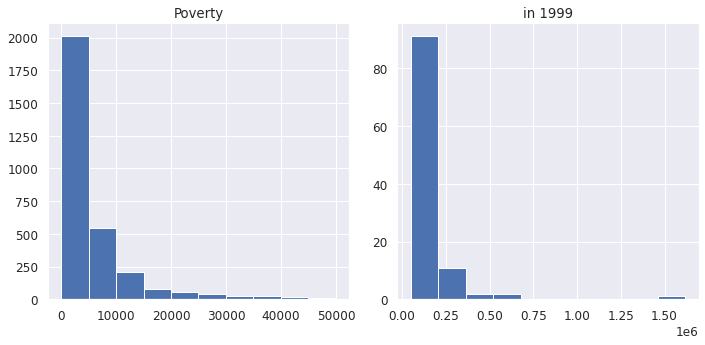

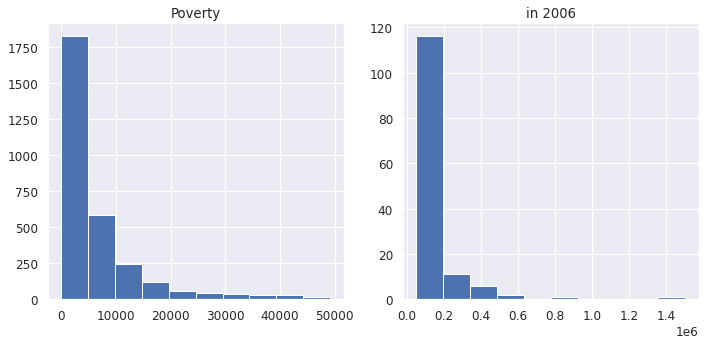

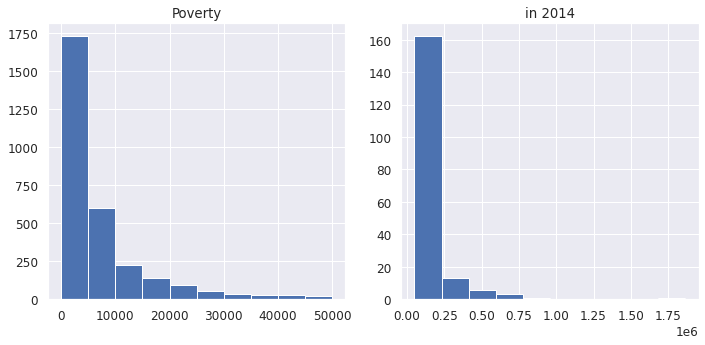

In [91]:
poor_1999 = deathrate.loc[(deathrate['Poverty'] < 50000) & (deathrate['Year'] == 1999)]
nonpoor_1999 = deathrate.loc[(deathrate['Poverty'] >= 50000) & (deathrate['Year'] == 1999)] 


plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True
fig, axes = plt.subplots(1, 2)

poor_1999.hist('Poverty', ax=axes[0])
nonpoor_1999.hist('Poverty', ax=axes[1])
plt.title("in 1999")
plt.show()


poor_2006 = deathrate.loc[(deathrate['Poverty'] < 50000) & (deathrate['Year'] == 2006)]
nonpoor_2006 = deathrate.loc[(deathrate['Poverty'] >= 50000) & (deathrate['Year'] == 2006)] 


plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True
fig, axes = plt.subplots(1, 2)

poor_2006.hist('Poverty', ax=axes[0])
nonpoor_2006.hist('Poverty', ax=axes[1])
plt.title("in 2006")
plt.show()


poor_2014 = deathrate.loc[(deathrate['Poverty'] < 50000) & (deathrate['Year'] == 2014)]
nonpoor_2014 = deathrate.loc[(deathrate['Poverty'] >= 50000) & (deathrate['Year'] == 2014)] 


plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True
fig, axes = plt.subplots(1, 2)

poor_2014.hist('Poverty', ax=axes[0])
nonpoor_2014.hist('Poverty', ax=axes[1])
plt.title("in 2014")
plt.show()


left graphs are poverty from 0-50000 and right is from 50000-1880000
The majority of our data is from low households 

In [37]:
# Analyze the deathrate by year 
year_means = deathrate.groupby('Year').mean()
years = year_means.index.values

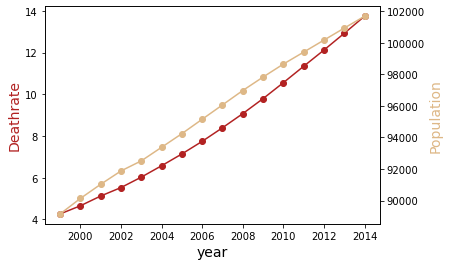

In [33]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(years, year_means['Deathrate'], label = "line 1", color='firebrick', marker='o')
# set x-axis label
ax.set_xlabel("Year",fontsize=14)
# set y-axis label
ax.set_ylabel("Deathrate",color="firebrick",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(years, year_means['Population'], label = "line 2", color='burlywood', marker='o')
ax2.set_ylabel("Population",color="burlywood",fontsize=14)
plt.show()

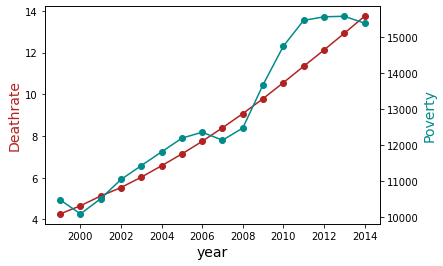

In [36]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(years, year_means['Deathrate'], label = "line 1", color='firebrick', marker='o')
# set x-axis label
ax.set_xlabel("Year",fontsize=14)
# set y-axis label
ax.set_ylabel("Deathrate",color="firebrick",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(years, year_means['Poverty'], label = "line 2", color='darkcyan', marker='o')
ax2.set_ylabel("Poverty",color="darkcyan",fontsize=14)
plt.show()

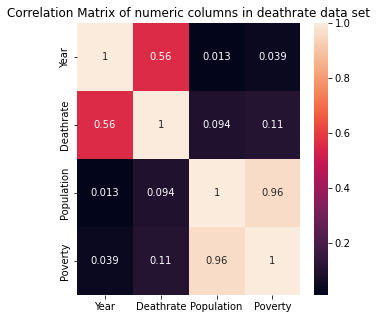

In [48]:
# Filter the dataframe to appropriate columns 
deathrate_numcols = deathrate[['Year', 'Deathrate', 'Population', 'Poverty']]

# Make the plot bigger 
fig, ax = plt.subplots(figsize=(5,5)) 

correlation_mat = deathrate_numcols.corr()
sns.heatmap(correlation_mat, annot = True, ax=ax)
plt.title("Correlation Matrix of numeric columns in deathrate data set")
plt.show()

Deathrate and Year are kinda correlated  
Population and Poverty are highly correlated

Deathrate is not highly correlated with population or poverty

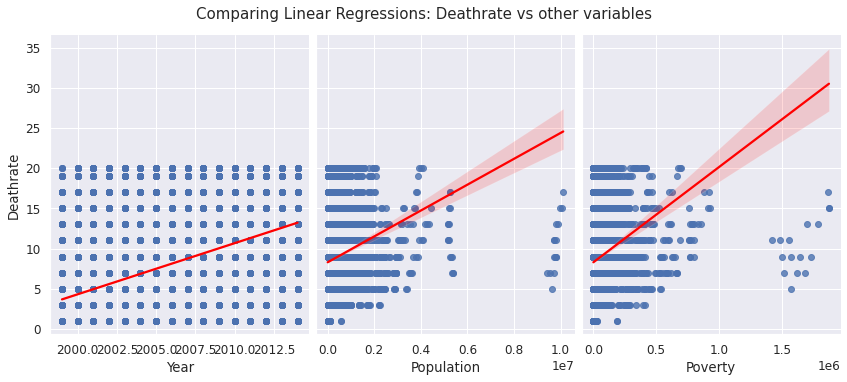

In [92]:
sns.set(font_scale=1.1)
pp = sns.pairplot(deathrate, x_vars=['Year', 'Population', 'Poverty'], 
             y_vars=["Deathrate"],
             height=5, aspect=.8, kind="reg",
             plot_kws={'line_kws':{'color':'red'}});
pp.fig.suptitle("Comparing Linear Regressions: Deathrate vs other variables", 
                y=1.05, size=15);